In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [114]:
file_path1 = r"E:\shaaaa\Downloads\calender.xlsx"
file_path2 = r"E:\shaaaa\Downloads\customers.xlsx"
file_path3 = r"E:\shaaaa\Downloads\product.xlsx"
file_path4 = r"E:\shaaaa\Downloads\Territory.xlsx"
file_path5 = r"E:\shaaaa\Downloads\sales.xlsx"
file_path6 = r"E:\shaaaa\Downloads\Budget.xlsx"
# Load each sheet into a separate DataFrame
budget_df = pd.read_excel(file_path6)
calendar_df = pd.read_excel(file_path1)
customers_df = pd.read_excel(file_path2)
products_df = pd.read_excel(file_path3)
territory_df = pd.read_excel(file_path4)
sales_df = pd.read_excel(file_path5)

In [66]:

print(calendar_df.isnull().sum())
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(territory_df.isnull().sum())
print(sales_df.isnull().sum())

Date              0
DateKey           0
Year              0
Quarter           0
MonthNum          0
Month             0
FiscalYear        0
FiscalQuarter     0
FiscalMonthNum    0
FiscalMonth       0
MonthYear         0
MonthYearLong     0
MonthYearNum      0
WeekdayNum        0
Weekday           0
WeekdayWeekend    0
dtype: int64
CustomerKey               0
FirstName                 0
LastName                  0
FullName                  0
BirthDate                 0
MaritalStatus             0
Gender                    0
YearlyIncome              0
TotalChildren             0
NumberChildrenAtHome      0
Education                 0
Occupation                0
HouseOwnerFlag            0
NumberCarsOwned           0
AddressLine1              0
DateFirstPurchase       566
CommuteDistance           0
dtype: int64
ProductKey              0
ProductName             0
SubCategory           209
Category              209
StandardCost          211
Color                 254
ListPrice             

In [67]:
products_df['SubCategory'].fillna('Unknown', inplace=True)
products_df['Category'].fillna('Unknown', inplace=True)
products_df['Color'].fillna('Unknown', inplace=True)
products_df['ProductLine'].fillna('Unknown', inplace=True)
products_df['ModelName'].fillna('Unknown', inplace=True)

In [68]:
territory_df['Region'].fillna('Other', inplace=True)
territory_df['Country'].fillna('Other', inplace=True)
territory_df['Group'].fillna('Other', inplace=True)


In [69]:
products_df.drop(columns=['ProductDescription'], inplace=True)


In [70]:
sales_df.drop(columns=[col for col in sales_df.columns if col.startswith('Unnamed')], inplace=True)


In [71]:
products_df['StandardCost'] = pd.to_numeric(products_df['StandardCost'], errors='coerce')
products_df['ListPrice'] = pd.to_numeric(products_df['ListPrice'], errors='coerce')

products_df['StandardCost'].fillna(products_df['StandardCost'].median(), inplace=True)
products_df['ListPrice'].fillna(products_df['ListPrice'].median(), inplace=True)

In [72]:
customers_df.drop(columns=['DateFirstPurchase'], inplace=True)

In [73]:
print(calendar_df.isnull().sum())
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(territory_df.isnull().sum())
print(sales_df.isnull().sum())

Date              0
DateKey           0
Year              0
Quarter           0
MonthNum          0
Month             0
FiscalYear        0
FiscalQuarter     0
FiscalMonthNum    0
FiscalMonth       0
MonthYear         0
MonthYearLong     0
MonthYearNum      0
WeekdayNum        0
Weekday           0
WeekdayWeekend    0
dtype: int64
CustomerKey             0
FirstName               0
LastName                0
FullName                0
BirthDate               0
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
Occupation              0
HouseOwnerFlag          0
NumberCarsOwned         0
AddressLine1            0
CommuteDistance         0
dtype: int64
ProductKey           0
ProductName          0
SubCategory          0
Category             0
StandardCost         0
Color                0
ListPrice            0
DaysToManufacture    0
ProductLine          0
ModelName            0
Photo   

Sales by Category:

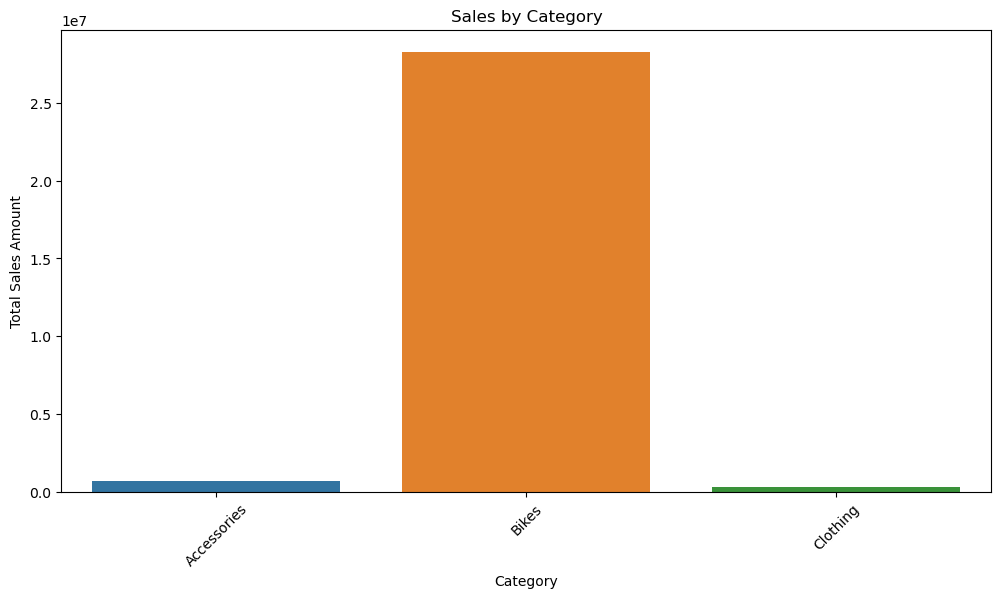

In [74]:
if 'sales_by_category' in locals():
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='SalesAmount', data=sales_by_category, ci=None)
    plt.title('Sales by Category')
    plt.xticks(rotation=45)
    plt.xlabel('Category')
    plt.ylabel('Total Sales Amount')
    plt.show()
else:
    print("The DataFrame 'sales_by_category' is not defined.")

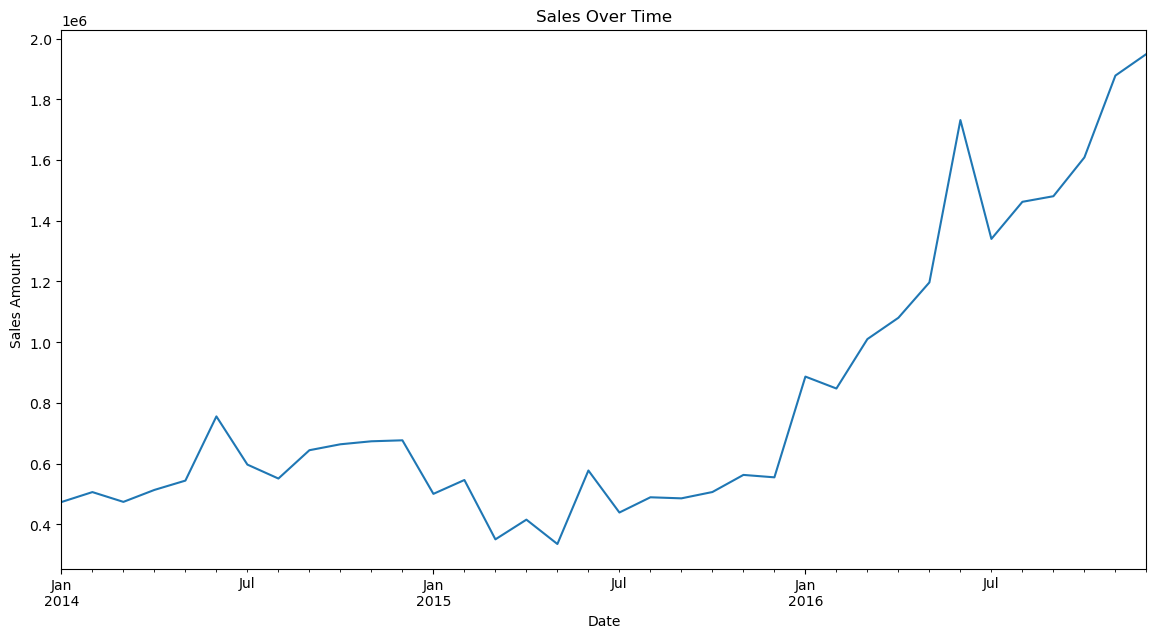

In [129]:
sales_over_time = merged_df.resample('M', on='OrderDate')['SalesAmount'].sum()

plt.figure(figsize=(14, 7))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.ylabel('Sales Amount')
plt.xlabel('Date')
plt.show()

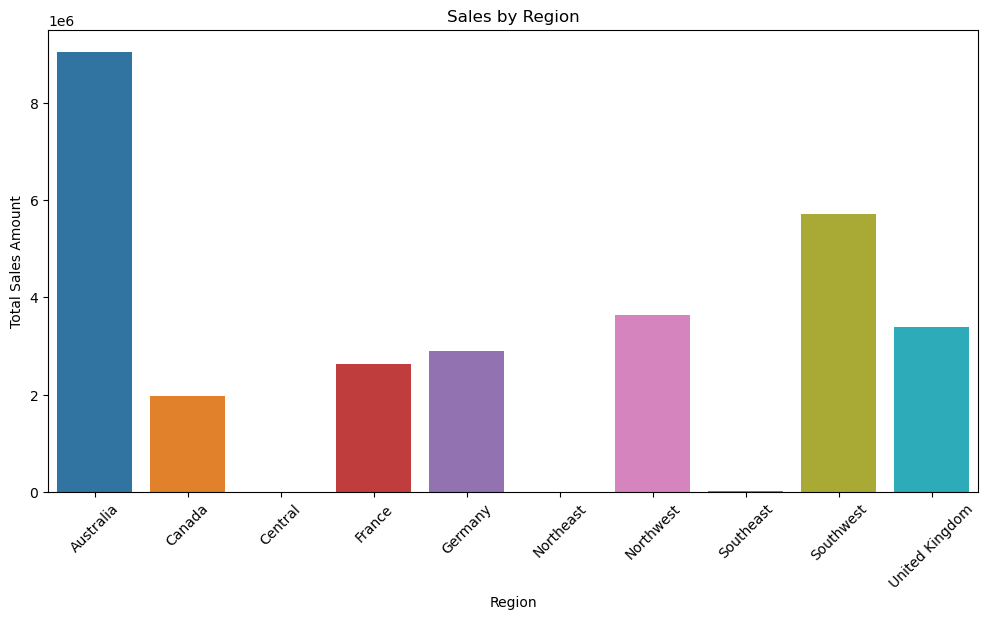

In [76]:
if 'sales_by_region' in locals():
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Region', y='SalesAmount', data=sales_by_region, ci=None)
    plt.title('Sales by Region')
    plt.xticks(rotation=45)
    plt.xlabel('Region')
    plt.ylabel('Total Sales Amount')
    plt.show()
else:
    print("The DataFrame 'sales_by_region' is not defined.")

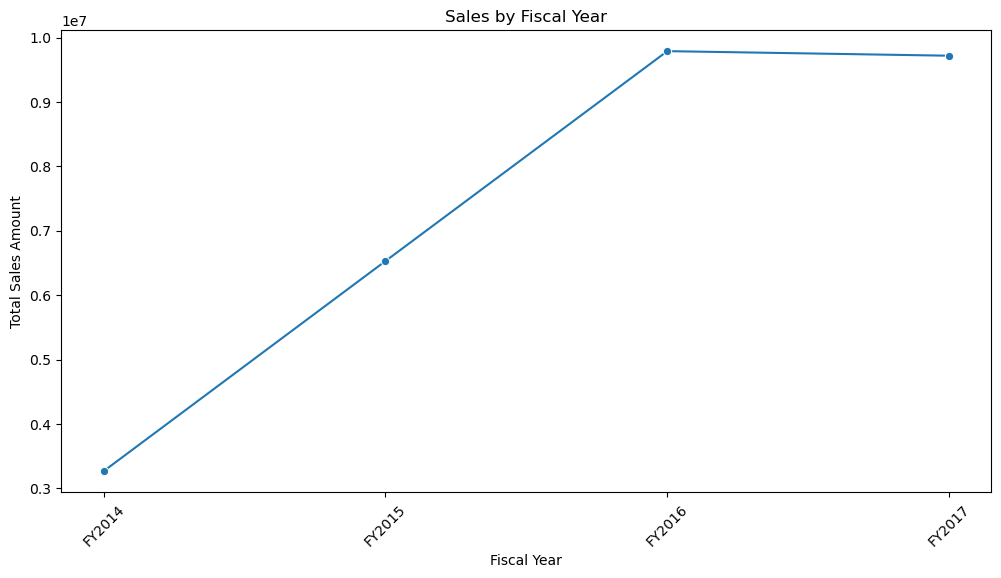

In [78]:
# Aggregating sales by FiscalYear
sales_by_year = merged_df.groupby('FiscalYear')['SalesAmount'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='FiscalYear', y='SalesAmount', data=sales_by_year, marker='o')
plt.title('Sales by Fiscal Year')
plt.xticks(rotation=45)
plt.xlabel('Fiscal Year')
plt.ylabel('Total Sales Amount')
plt.show()









In [79]:
print(merged_df.columns)
print(merged_df.head())



Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'StandardCost_x', 'List Price', 'diif std cost',
       'diff list price', 'ProductName', 'SubCategory', 'Category',
       'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture',
       'ProductLine', 'ModelName', 'Photo', 'StartDate', 'FirstName',
       'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education',
       'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1',
       'CommuteDistance', 'Region', 'Country', 'Group', 'RegionImage',
       'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday',
       

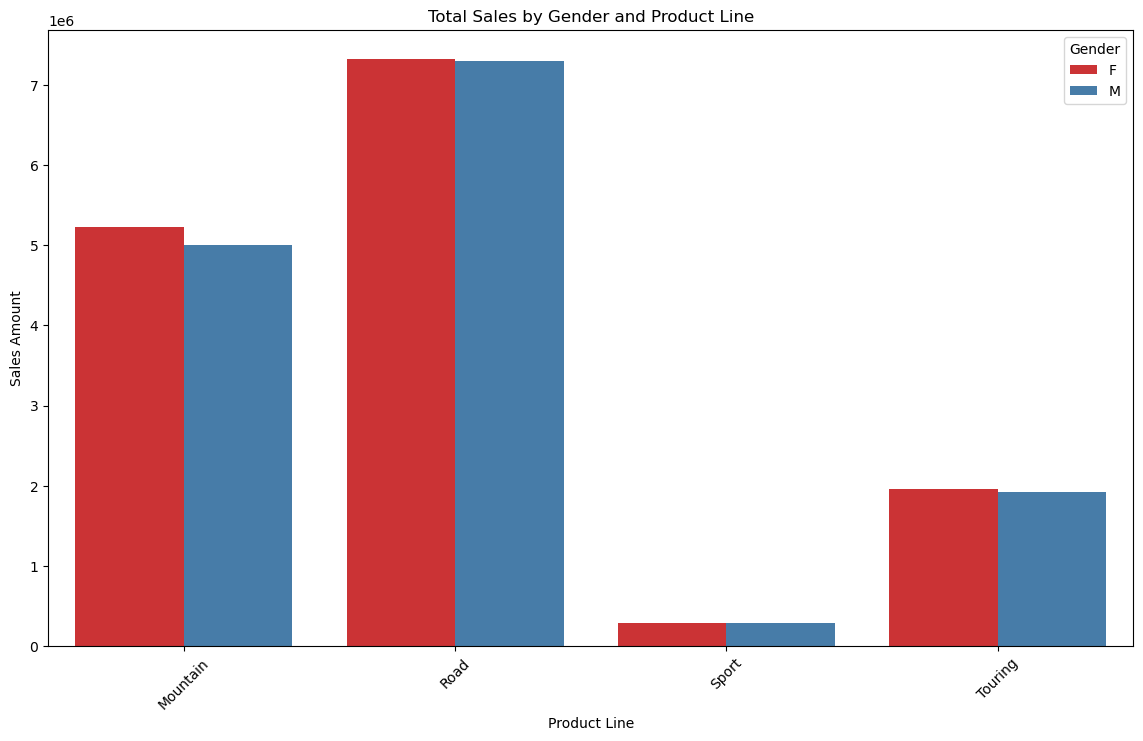

In [80]:
# Aggregate sales by Gender and ProductLine
sales_by_gender_product_line = merged_df.groupby(['Gender', 'ProductLine']).agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='ProductLine', y='SalesAmount', hue='Gender', data=sales_by_gender_product_line, palette='Set1')
plt.title('Total Sales by Gender and Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


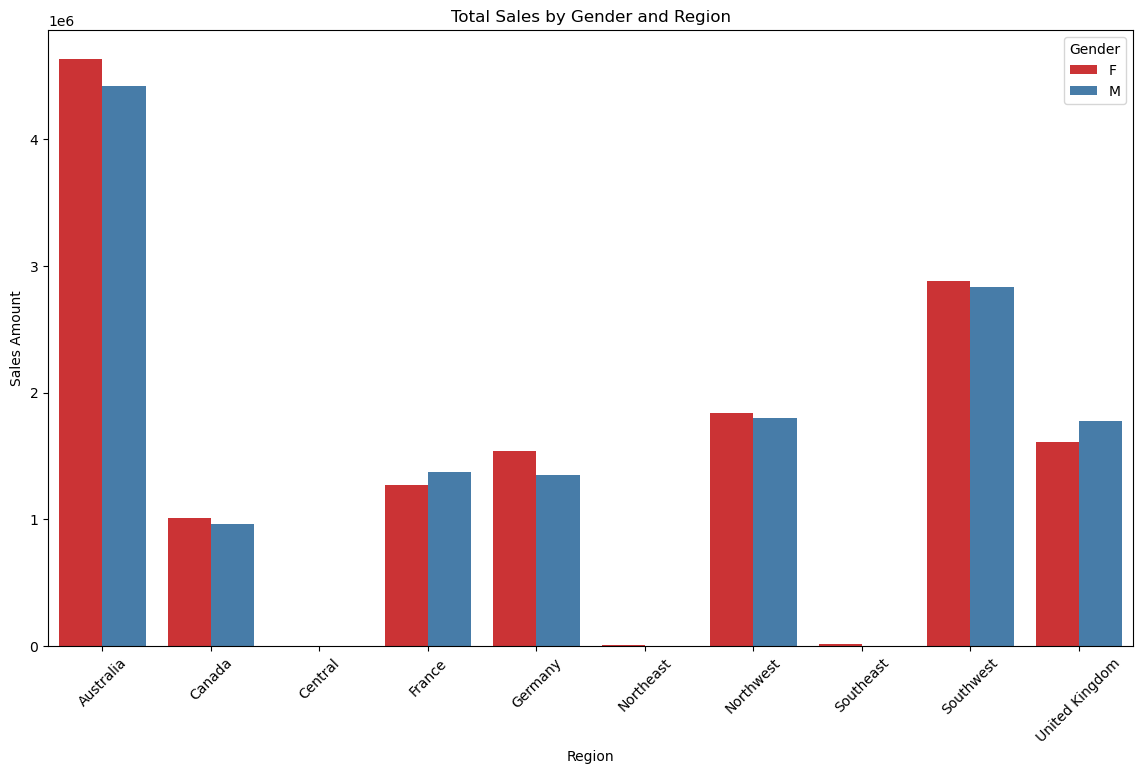

In [81]:
# Aggregate sales by Gender and Region
sales_by_gender_region = merged_df.groupby(['Gender', 'Region']).agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='SalesAmount', hue='Gender', data=sales_by_gender_region, palette='Set1')
plt.title('Total Sales by Gender and Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


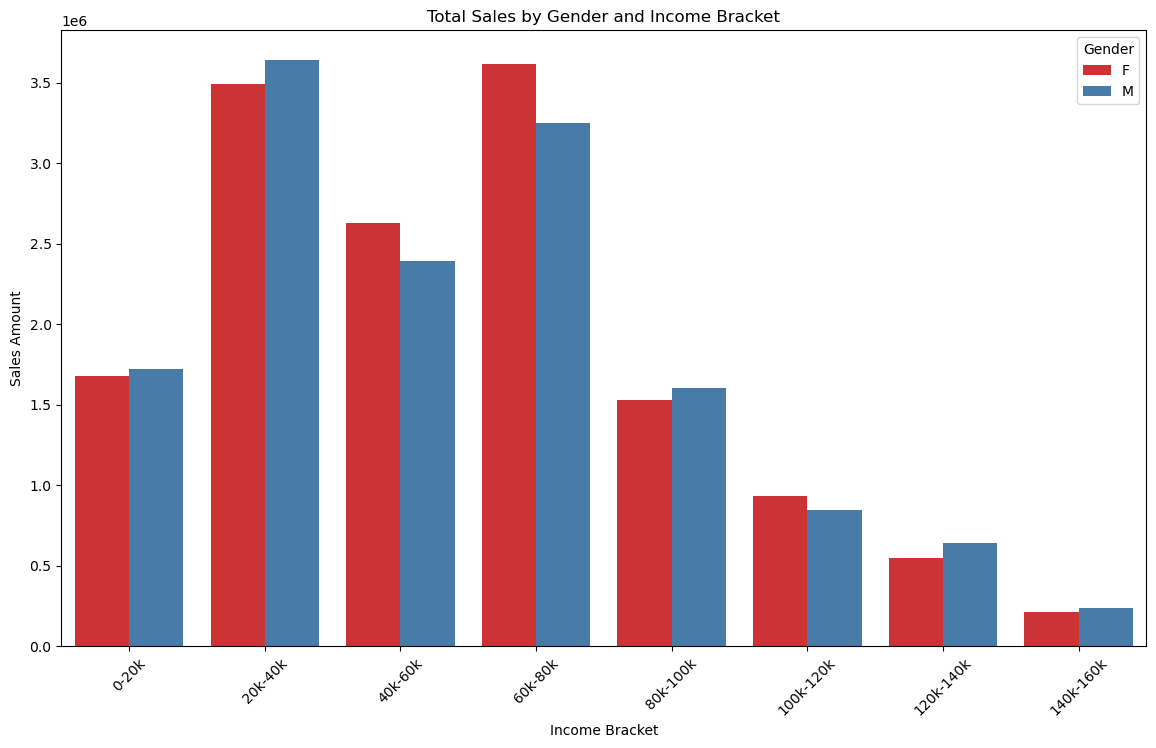

In [82]:
# Define income bins
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k']
merged_df['IncomeBracket'] = pd.cut(merged_df['YearlyIncome'], bins=income_bins, labels=income_labels)

# Aggregate sales by Gender and IncomeBracket
sales_by_gender_income = merged_df.groupby(['Gender', 'IncomeBracket']).agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='IncomeBracket', y='SalesAmount', hue='Gender', data=sales_by_gender_income, palette='Set1')
plt.title('Total Sales by Gender and Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


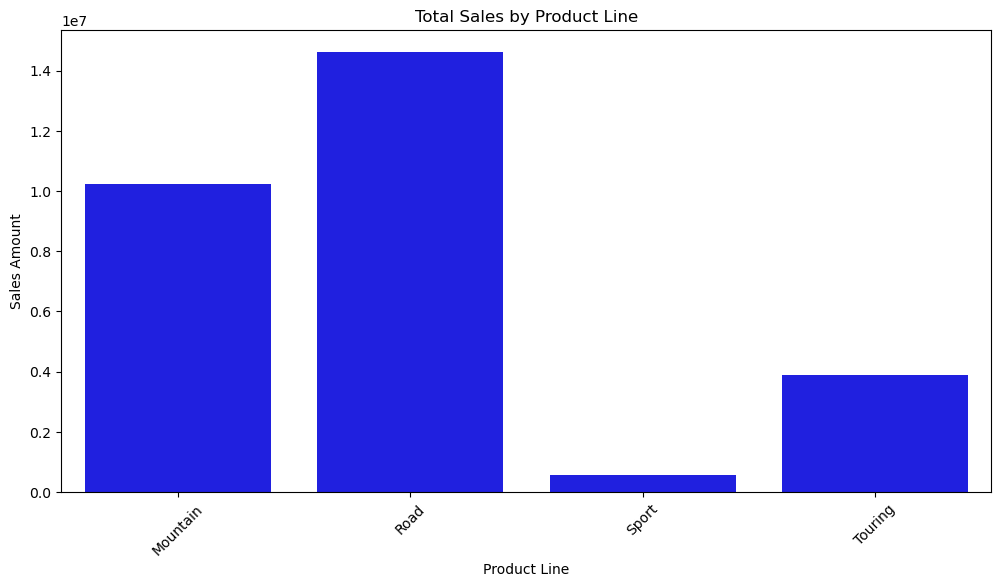

In [83]:
# Aggregate sales by ProductLine
sales_by_product_line = merged_df.groupby('ProductLine').agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='SalesAmount', data=sales_by_product_line, color='blue')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.xlabel('Product Line')
plt.ylabel('Sales Amount')
plt.show()


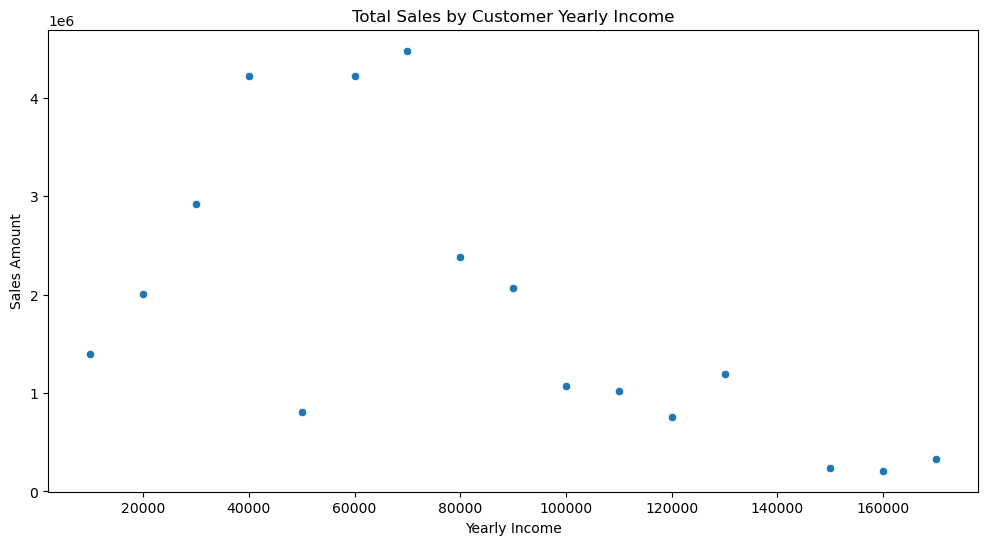

In [84]:
# Aggregate sales by YearlyIncome
sales_by_income = merged_df.groupby('YearlyIncome').agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearlyIncome', y='SalesAmount', data=sales_by_income)
plt.title('Total Sales by Customer Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Sales Amount')
plt.show()


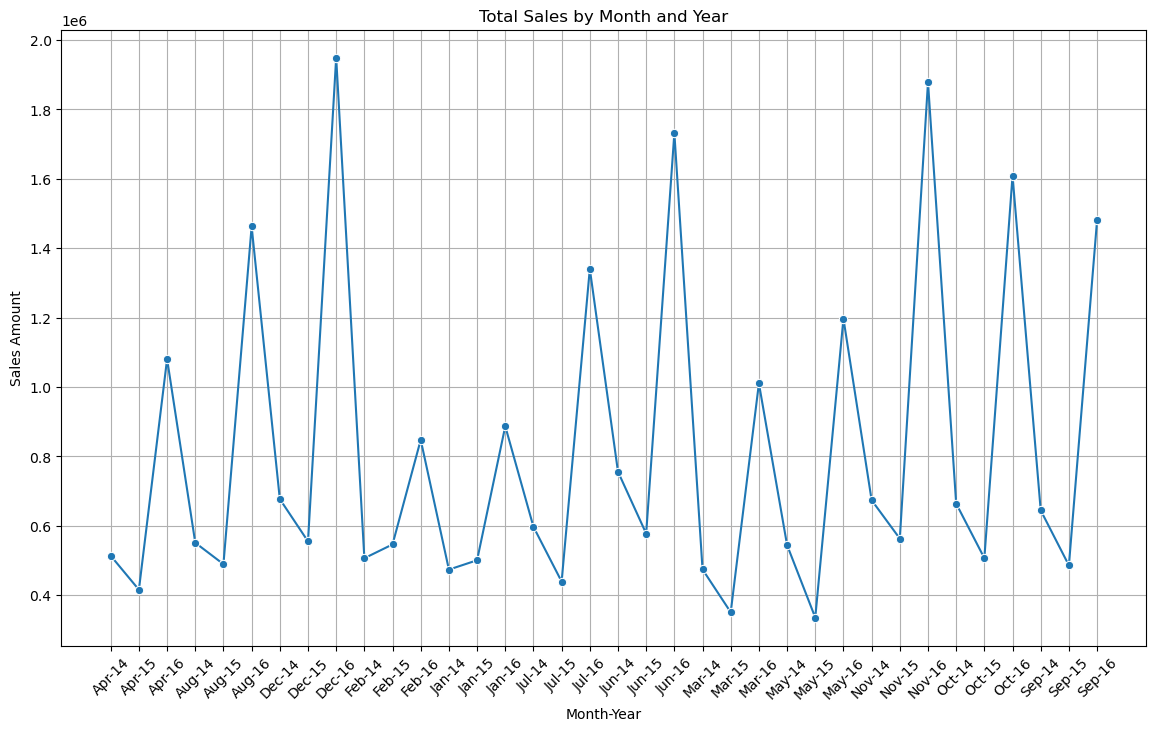

In [85]:
# Aggregate sales by MonthYear
sales_by_month_year = merged_df.groupby('MonthYear').agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='MonthYear', y='SalesAmount', data=sales_by_month_year, marker='o')
plt.title('Total Sales by Month and Year')
plt.xlabel('Month-Year')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


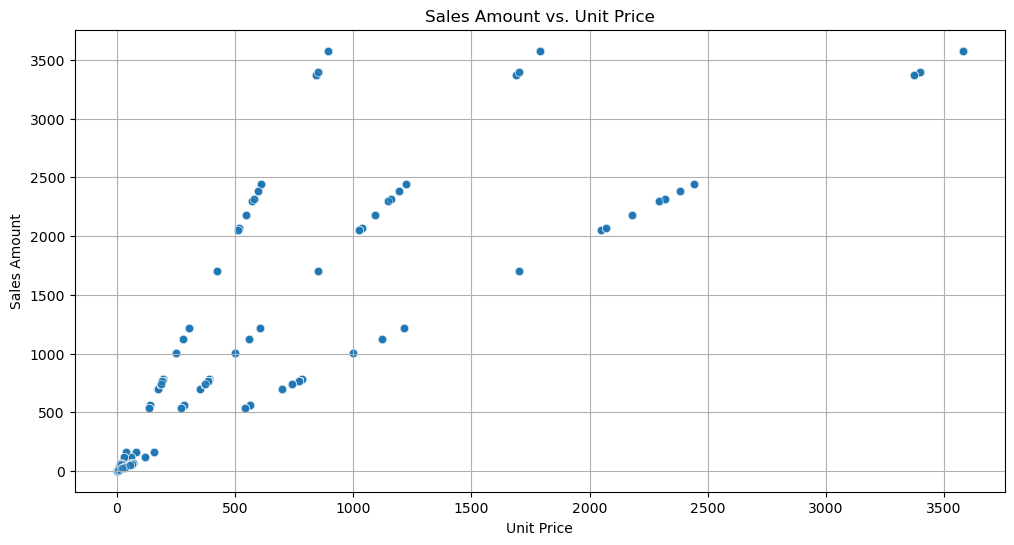

In [86]:
# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UnitPrice', y='SalesAmount', data=merged_df, alpha=0.6)
plt.title('Sales Amount vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


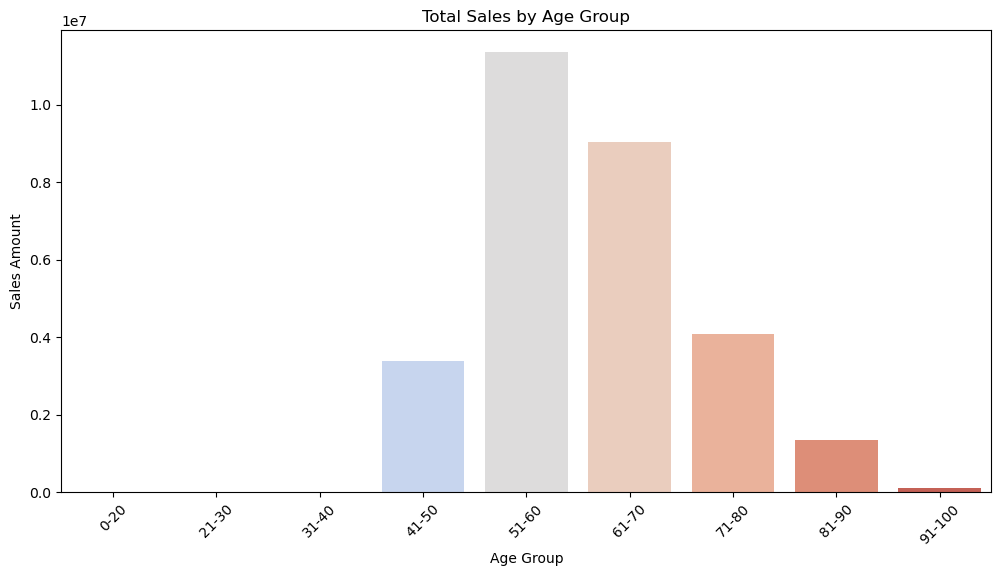

In [87]:
# Calculate age
merged_df['Age'] = pd.to_datetime('today').year - pd.to_datetime(merged_df['BirthDate']).dt.year

# Define age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

# Aggregate sales by AgeGroup
sales_by_age_group = merged_df.groupby('AgeGroup').agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='SalesAmount', data=sales_by_age_group, palette='coolwarm')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


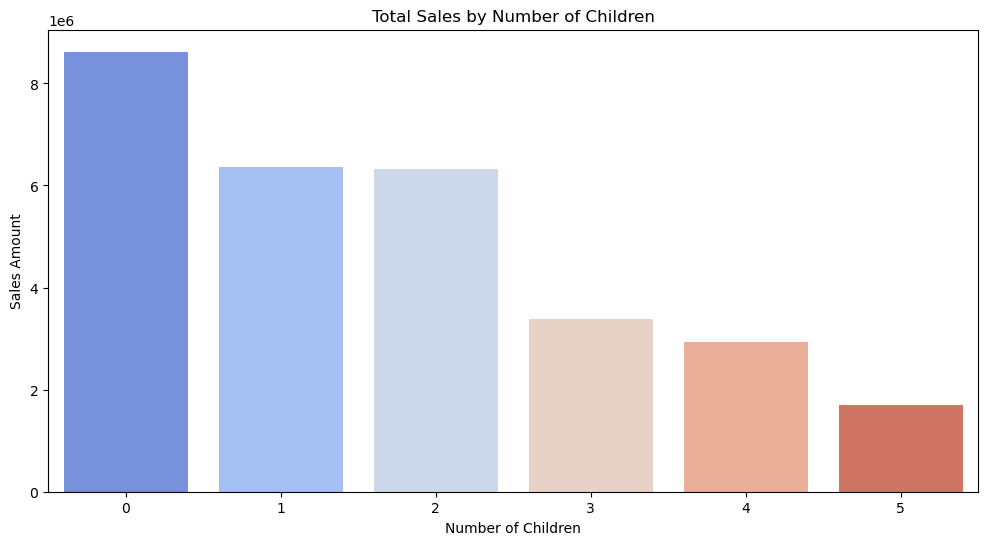

In [88]:
# Aggregate sales by TotalChildren
sales_by_children = merged_df.groupby('TotalChildren').agg({
    'SalesAmount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalChildren', y='SalesAmount', data=sales_by_children, palette='coolwarm')
plt.title('Total Sales by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Sales Amount')
plt.show()


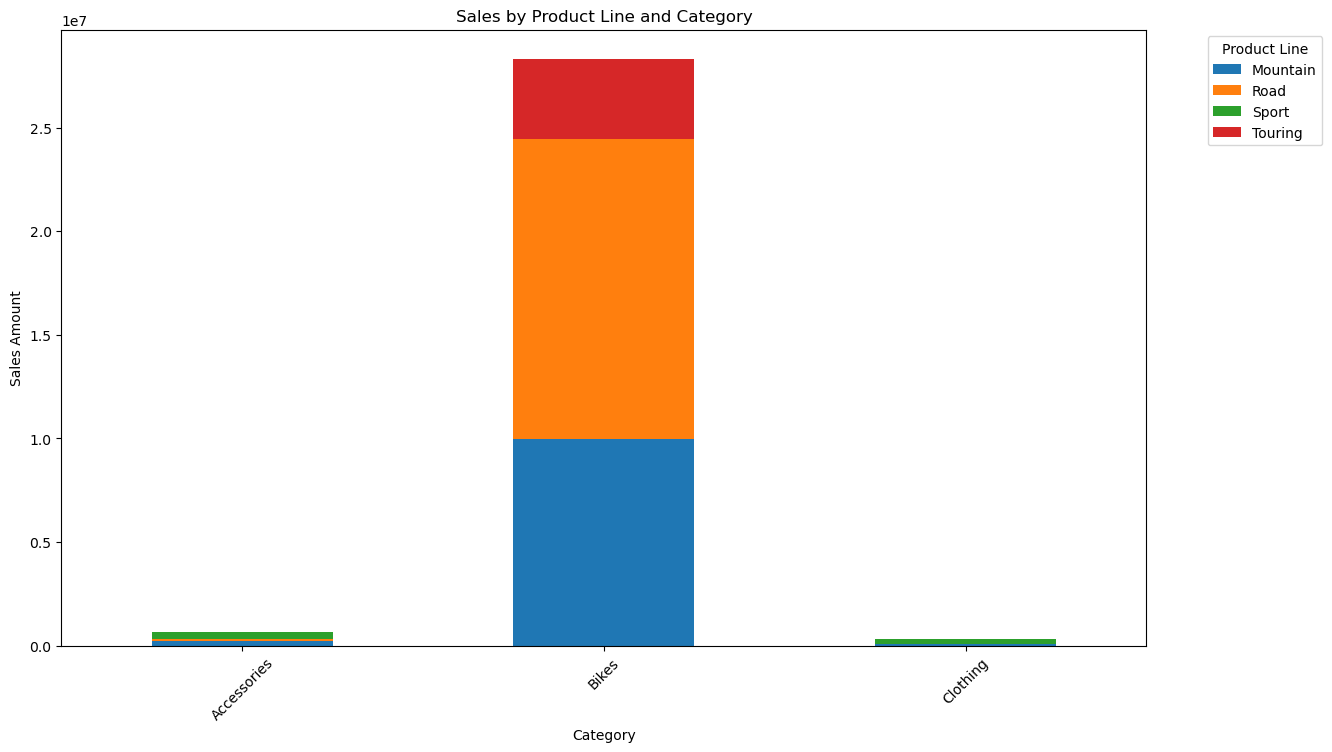

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales by ProductLine and Category
sales_by_line_category = merged_df.groupby(['Category', 'ProductLine']).agg({
    'SalesAmount': 'sum'
}).reset_index()

# Pivot the data for stacked bar plot
pivot_sales = sales_by_line_category.pivot(index='Category', columns='ProductLine', values='SalesAmount')

# Plotting
pivot_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Sales by Product Line and Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
